# Study Roommate's Snores with FFT

### Wenjie Chen
### Oct. 17th, 2018

## 1. Read and Process Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

The sound intensity data was recorded with an app called "Science Journal" (by Google) on my smartphone. We can export recorded data as a __CSV__ file, which is a great feature of this app.

__CSV__ stands for __Comma-Seperated-Values__. This is actually how we usually represent a multi-dimensional data set. In this case, the data set has two variables, namely "relative_time" and "DecibelSource". Therefore if we open the exported csv file with some text editor, we will see something like this:

```
relative_time,DecibelSource
0,10.928192969059019
40,11.514444136405363
80,11.90159672482479
120,10.941871546725832
160,13.354825269671064
......
```

Python has a specific module to deal with such kind of encoded data, namely "csv".

In [2]:
# Read data
datablock = []
with open('Roommate_s Snores Recording 1.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    line_num = 0
    for row in spamreader:
        if line_num == 0:
            print(f'Column names are {", ".join(row)}')
        else:
            datablock.append([float(row[0]), float(row[1])])
        line_num = line_num + 1
    print(f'Processed {line_num} lines.')

Column names are relative_time, DecibelSource
Processed 1503 lines.


In [3]:
# Process data
datablock = np.transpose(np.array(datablock))
(t, I) = (datablock[0], datablock[1]) # t is time (ms), I is sound intensity (dB).

Now let's show our recorded data: sound intensity (measured in dB) varies with time (measured in ms).

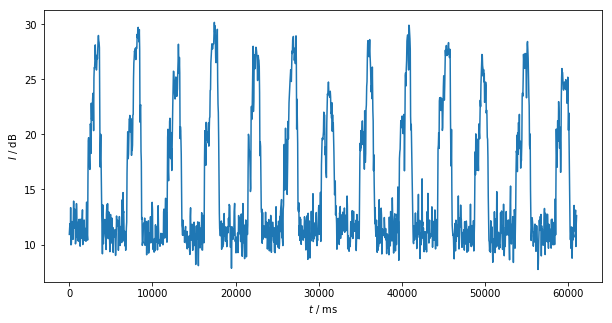

In [4]:
# Plot the figure
plt.figure(figsize=(10,5))
plt.plot(t, I)
plt.xlabel("$t$ / ms")
plt.ylabel("$I$ / dB")
plt.show()

## 2. Fourier Transformation

First we'll do a discrete Fourier transformation. This changes our space from time space to frequency space (both are 1-dimensional space).

In [5]:
# Fast fourier transform
N = len(t)
A = np.fft.fft(I) / N
f = np.fft.fftfreq(t.shape[-1], t[1])
f = f[range(int(N/2))]
A = A[range(int(N/2))]

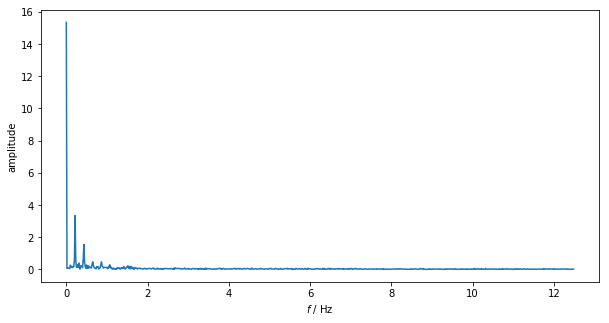

In [6]:
# Plot the figure
plt.figure(figsize=(10,5))
plt.plot(f * 1000, np.absolute(A))
plt.xlabel("$f$ / Hz")
plt.ylabel("amplitude")
plt.show()

## 3. Data Interpretation

The sharpest peak at $f_0 = 0~ \rm Hz$ is nothing but the flat background noise. The real important one is the next peak, which shows up at about $f_1 = 0.2164 ~ \rm Hz$. Some other peaks also show up at the frequencies which satisfy $f = Nf_1$, where $N$ is some integer.

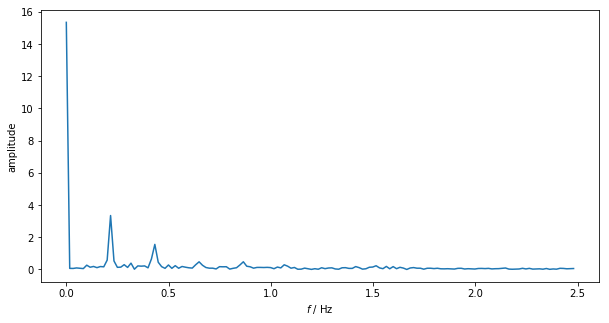

In [7]:
# Plot the figure
plt.figure(figsize=(10,5))
plt.plot(f[0:150] * 1000, np.absolute(A[0:150]))
plt.xlabel("$f$ / Hz")
plt.ylabel("amplitude")
plt.show()

In [8]:
# Interpretation
A_norm = np.absolute(A)
[index] = [i for i, j in enumerate(A_norm) if j == max(A_norm[1:50])]
snore_per_minute = 60 * (f[index] * 1000)
print(f'My roommate snores {snore_per_minute} times per minute.')

My roommate snores 12.982689747003993 times per minute.


Now let's see what will happen if only this frequency retains.

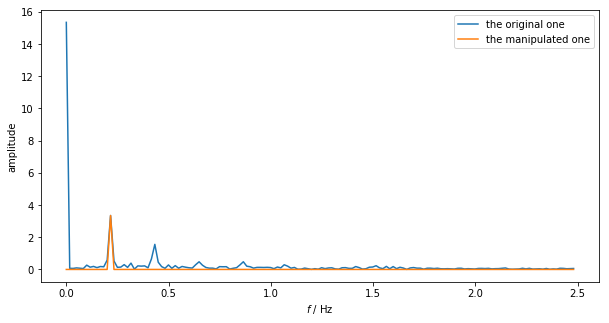

In [9]:
# Fourier transform
A = np.fft.fft(I)
f = np.fft.fftfreq(t.shape[-1], t[1])
f0 = f[range(int(N/2))]

# The original result
A1 = A[range(int(N/2))] / N

# The manipulated result, leave only one frequency.
A_cutoff = np.copy(A)
A_cutoff[0:13] = 0
A_cutoff[-1:-13] = 0
A_cutoff[14:-14] = 0
A2 = A_cutoff[range(int(N/2))] / N

# Plot the figure
plt.figure(figsize=(10,5))
plt.plot(f0[0:150] * 1000, np.absolute(A1[0:150]))
plt.plot(f0[0:150] * 1000, np.absolute(A2[0:150]))
plt.legend(['the original one', 'the manipulated one'])
plt.xlabel("$f$ / Hz")
plt.ylabel("amplitude")
plt.show()

Apply the inverse fourier transformation on the manipulated one, we'll see a pure oscillation without high frequency noise, which is in our expectation.

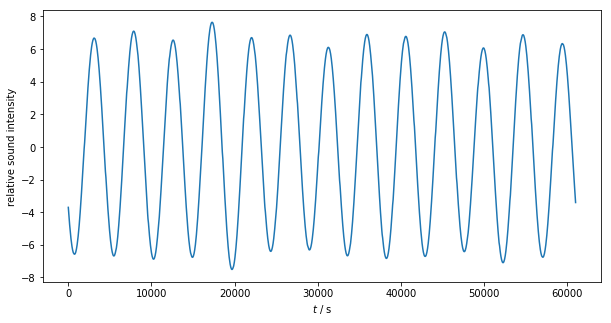

In [10]:
# Inverse Fourier transform
B = np.fft.ifft(A_cutoff)
plt.figure(figsize=(10,5))
plt.plot(t, B.real)
plt.xlabel("$t$ / s")
plt.ylabel("relative sound intensity")
plt.show()

Moreover, as I mentioned above, zero frequency is the flat background noise. If we leave this frequency unchanged in our manipulated FFT result, and then apply the inverse FFT, we'll finally obtain the same wave shape as the last picture, with a global shift.

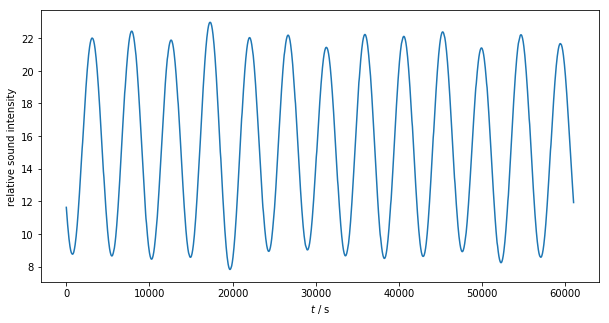

In [11]:
# The manipulated result, leave only one frequency and the zero frequency.
A_cutoff = np.copy(A)
A_cutoff[1:13] = 0 # leave the zero frequency unchanged
A_cutoff[-1:-13] = 0
A_cutoff[14:-14] = 0

# Inverse Fourier transform
B = np.fft.ifft(A_cutoff)
plt.figure(figsize=(10,5))
plt.plot(t, B.real)
plt.xlabel("$t$ / s")
plt.ylabel("relative sound intensity")
plt.show()

If we leave more frequency unchanged, the result will be more like the orignal recorded data.

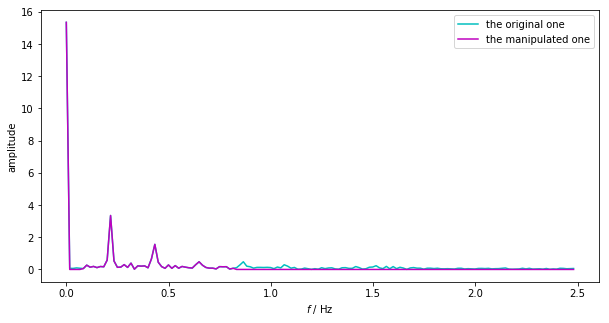

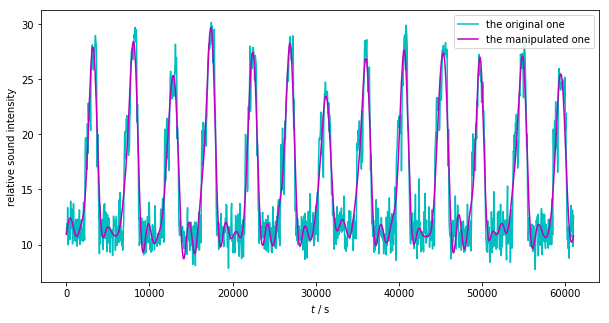

In [12]:
# The manipulated result, leave only one frequency and the zero frequency.
A_cutoff = np.copy(A)
A_cutoff[1:5] = 0 # leave the zero frequency unchanged
A_cutoff[-1:-5] = 0
A_cutoff[50:-50] = 0
A2 = A_cutoff[range(int(N/2))] / N

# Plot the figure
plt.figure(figsize=(10,5))
plt.plot(f0[0:150] * 1000, np.absolute(A1[0:150]), 'c')
plt.plot(f0[0:150] * 1000, np.absolute(A2[0:150]), 'm')
plt.legend(['the original one', 'the manipulated one'])
plt.xlabel("$f$ / Hz")
plt.ylabel("amplitude")
plt.show()

# Inverse Fourier transform
B = np.fft.ifft(A_cutoff)
plt.figure(figsize=(10,5))
plt.plot(t, I, 'c')
plt.plot(t, B.real, 'm')
plt.legend(['the original one', 'the manipulated one'])
plt.xlabel("$t$ / s")
plt.ylabel("relative sound intensity")
plt.show()

Thus ends our research.